 # Project 7: Explanatory Data Analysis & Advanced Visualization (Baby Names Dataset)

# Project Brief for Self-Coders

Here you´ll have the opportunity to code major parts of Project 7 on your own. If you need any help or inspiration, have a look at the Videos or the Jupyter Notebook with the full code. <br> <br>
Keep in mind that it´s all about __getting the right results/conclusions__. It´s not about finding the identical code. Things can be coded in many different ways. Even if you come to the same conclusions, it´s very unlikely that we have the very same code. 

## First Inspection: The most popular Names in 2018

1. __Load__ and __inspect__ the dataset "us_baby_names.csv". __Save__ the DataFrame in __df__.

In [53]:
import pandas as pd
import numpy as np
df_raw=pd.read_csv("us_baby_names.csv")
df=df_raw.copy()
df

,Year,Name,Gender,Count
0,1880,Mary,F,7065
1,1880,Anna,F,2604
2,1880,Emma,F,2003
3,1880,Elizabeth,F,1939
4,1880,Minnie,F,1746
...,...,...,...,...
1957041,2018,Zylas,M,5
1957042,2018,Zyran,M,5
1957043,2018,Zyrie,M,5
1957044,2018,Zyron,M,5


In [3]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1957046 entries, 0 to 1957045
Data columns (total 4 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   Year    1957046 non-null  int64 
 1   Name    1957046 non-null  object
 2   Gender  1957046 non-null  object
 3   Count   1957046 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 59.7+ MB


2. Find the most popular __Baby Girl Names__ in __2018__. 

In [4]:
girl_names_2018=df.loc[((df.Gender=='F') & (df.Year==2018)),['Name','Count']].sort_values('Count', ascending=False).head(10)
girl_names_2018

,Name,Count
1925013,Emma,18688
1925014,Olivia,17921
1925015,Ava,14924
1925016,Isabella,14464
1925017,Sophia,13928
1925018,Charlotte,12940
1925019,Mia,12642
1925020,Amelia,12301
1925021,Harper,10582
1925022,Evelyn,10376


3. Find the most popular __Baby Boy Names__ in __2018__.

In [5]:
boy_names_2018=df.loc[((df.Gender=='M') & (df.Year==2018)),['Name','Count']].sort_values('Count', ascending=False).head(10)
boy_names_2018

,Name,Count
1943042,Liam,19837
1943043,Noah,18267
1943044,William,14516
1943045,James,13525
1943046,Oliver,13389
1943047,Benjamin,13381
1943048,Elijah,12886
1943049,Lucas,12585
1943050,Mason,12435
1943051,Logan,12352


4. __Create__ the function __most_pop(year, gender, n)__ that returns the __n__ most popular __M/F__ Names in the __year WXYZ__.

In [6]:
def most_pop(year:int, gender:str, n:int)->pd.DataFrame:
    df_=df.loc[((df.Gender==gender) & (df.Year==year)),['Name','Count']].sort_values('Count', ascending=False).head(n)
    return df_
most_pop(2016,'M',20)

,Name,Count
1878249,Noah,19117
1878250,Liam,18218
1878251,William,15761
1878252,Mason,15244
1878253,James,14862
1878254,Benjamin,14641
1878255,Jacob,14510
1878256,Michael,14088
1878257,Elijah,13902
1878258,Ethan,13819


## Most common boy name per year

In [7]:
most_pop_boy_per_year=pd.DataFrame()
for year in range(1880,2019):
    df_=most_pop(year,'M',1)
    df_['Year']=year
    most_pop_boy_per_year=pd.concat([most_pop_boy_per_year,df_], ignore_index=True)
most_pop_boy_per_year

,Name,Count,Year
0,John,9655,1880
1,John,8769,1881
2,John,9557,1882
3,John,8894,1883
4,John,9388,1884
...,...,...,...
134,Noah,19305,2014
135,Noah,19635,2015
136,Noah,19117,2016
137,Liam,18798,2017


In [8]:
most_pop_boy_per_year.Name.value_counts()

John       44
Michael    44
Robert     17
Jacob      14
James      13
Noah        4
Liam        2
David       1
Name: Name, dtype: int64

## Evergreen Names (1880 - 2018)

5. Find those __Evergreen Boy Names__ that are in __1880 and 2018__ among the most popular Boy Names (__Top 20__).

In [9]:
top_20_boy_per_year=pd.DataFrame()
for year in range(1880,2019):
    df_=most_pop(year,'M',20)
    df_['Year']=year
    top_20_boy_per_year=pd.concat([top_20_boy_per_year,df_], ignore_index=True)
top_20_boy_per_year

,Name,Count,Year
0,John,9655,1880
1,William,9532,1880
2,James,5927,1880
3,Charles,5348,1880
4,George,5126,1880
...,...,...,...
2775,Henry,10649,2018
2776,Jackson,10323,2018
2777,Sebastian,10054,2018
2778,Aiden,9979,2018


In [10]:
evergreen_boy=top_20_boy_per_year.Name.value_counts().head(20).to_frame(name='counts')
evergreen_boy

,counts
William,139
James,139
Joseph,136
John,129
Robert,114
Thomas,96
David,93
Charles,90
Michael,80
Paul,72


6. Find those __Evergreen Girl Names__ that are in __1880 and 2018__ among the most popular Girl Names (__Top 20__).

In [11]:
top_20_girl_per_year=pd.DataFrame()
for year in range(1880,2019):
    df_=most_pop(year,'F',20)
    df_['Year']=year
    top_20_girl_per_year=pd.concat([top_20_girl_per_year,df_], ignore_index=True)
top_20_girl_per_year

,Name,Count,Year
0,Mary,7065,1880
1,Anna,2604,1880
2,Emma,2003,1880
3,Elizabeth,1939,1880
4,Minnie,1746,1880
...,...,...,...
2775,Avery,8053,2018
2776,Sofia,7621,2018
2777,Camila,7473,2018
2778,Aria,7394,2018


In [12]:
evergreen_girl=top_20_girl_per_year.Name.value_counts().head(20).to_frame(name='counts')
evergreen_girl

,counts
Elizabeth,121
Mary,96
Margaret,73
Anna,53
Helen,53
Alice,50
Ruth,47
Florence,45
Sarah,45
Dorothy,43


In [13]:
#Check all names that are both for boy and girls
a=df.groupby(['Name','Gender']).Count.agg([sum, np.mean])
a[a.index.get_level_values(level=0).duplicated(keep=False)]

sum        mean
Name  Gender                  
Aaden F          5    5.000000
      M       4828  268.222222
Aadi  F         16    5.333333
      M        851   53.187500
Aadyn F         16    8.000000
...            ...         ...
Zyonn M         40    8.000000
Zyree F         16    5.333333
      M         94    8.545455
Zyrie F         19    6.333333
      M         16    5.333333

[21546 rows x 2 columns]

## Advanced Data Aggregation

7. Create the following __aggregated DataFrame agg__ (you can see the first and last 5 rows):

In [14]:
agg_df=df.groupby(['Name','Gender']).agg(Total=('Count','sum'), No_Year=('Year','count'),First_Year=('Year','min'),
                                        Last_Year=('Year','max'),Max_Count=('Count','max'))
agg_df

,,Total,No_Year,First_Year,Last_Year,Max_Count
Name,Gender,,,,,
Aaban,M,114,11,2007,2018,16
Aabha,F,35,5,2011,2016,9
Aabid,M,16,3,2003,2018,6
Aabidah,F,5,1,2018,2018,5
Aabir,M,10,2,2016,2018,5
...,...,...,...,...,...,...
Zyvion,M,5,1,2009,2009,5
Zyvon,M,7,1,2015,2015,7
Zyyanna,F,6,1,2010,2010,6


In [15]:
best_y=df.groupby(['Name','Gender']).Count.idxmax().apply(lambda x: df.loc[x].Year)
best_y.rename('Best_Year', inplace=True)

Name     Gender
Aaban    M         2014
Aabha    F         2014
Aabid    M         2018
Aabidah  F         2018
Aabir    M         2016
                   ... 
Zyvion   M         2009
Zyvon    M         2015
Zyyanna  F         2010
Zyyon    M         2014
Zzyzx    M         2010
Name: Best_Year, Length: 109173, dtype: int64

In [16]:
agg_df_new=agg_df.join(best_y)
agg_df_new

,,Total,No_Year,First_Year,Last_Year,Max_Count,Best_Year
Name,Gender,,,,,,
Aaban,M,114,11,2007,2018,16,2014
Aabha,F,35,5,2011,2016,9,2014
Aabid,M,16,3,2003,2018,6,2018
Aabidah,F,5,1,2018,2018,5,2018
Aabir,M,10,2,2016,2018,5,2016
...,...,...,...,...,...,...,...
Zyvion,M,5,1,2009,2009,5,2009
Zyvon,M,7,1,2015,2015,7,2015
Zyyanna,F,6,1,2010,2010,6,2010


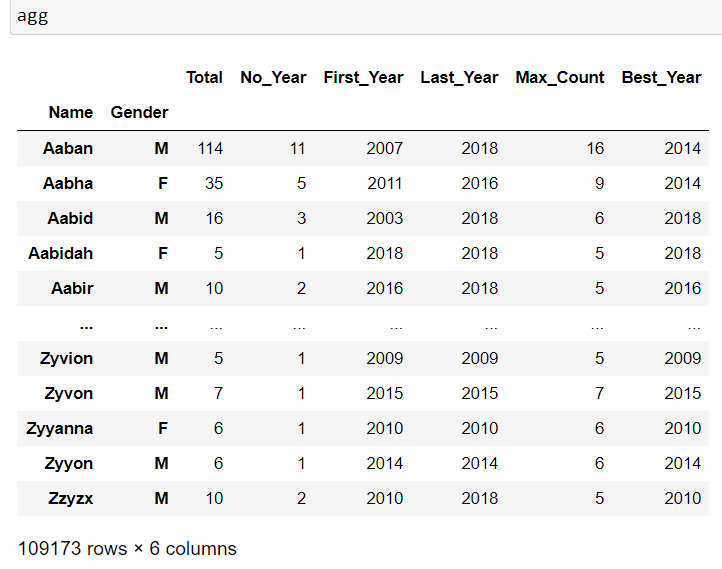

__How to interpret agg (and the first observation Aaban, M):__<br>
- There are in total 114 Male Babies with the name Aaban (Total)<br>
- The combination/entry (Aaban, M) can be found in 11 different years (No_Year)<br>
- The combination/entry (Aaban, M) appeared in the year 2007 for the first time (First_Year)<br>
- The last appearance was in the year 2018 (Last_Year)<br>
- In the most popular year, (Aaban, M) appeared 16 times (Max_Count)
- The most popular year for (Aaban, M) (Best_Year)

8. __Reset__ the Index and create a RangeIndex.

In [17]:
agg=agg_df_new.reset_index()
agg

,Name,Gender,Total,No_Year,First_Year,Last_Year,Max_Count,Best_Year
0,Aaban,M,114,11,2007,2018,16,2014
1,Aabha,F,35,5,2011,2016,9,2014
2,Aabid,M,16,3,2003,2018,6,2018
3,Aabidah,F,5,1,2018,2018,5,2018
4,Aabir,M,10,2,2016,2018,5,2016
...,...,...,...,...,...,...,...,...
109168,Zyvion,M,5,1,2009,2009,5,2009
109169,Zyvon,M,7,1,2015,2015,7,2015
109170,Zyyanna,F,6,1,2010,2010,6,2010
109171,Zyyon,M,6,1,2014,2014,6,2014


9. __Filter__ agg for the combination (Mary, F)

In [17]:
agg.loc[(agg.Name=='Mary') & (agg.Gender=='F'),:]

,Name,Gender,Total,No_Year,First_Year,Last_Year,Max_Count,Best_Year
68679,Mary,F,4125675,139,1880,2018,73985,1921


## Distribution of most popular names

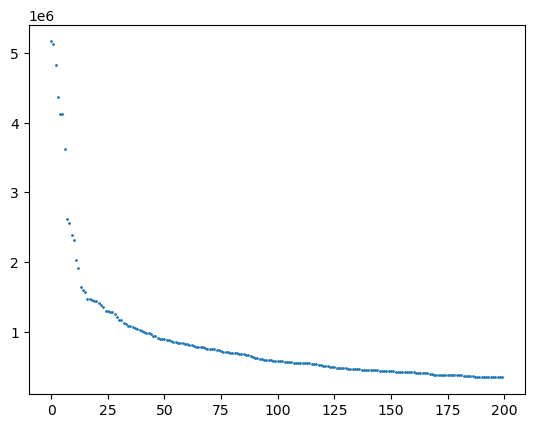

In [44]:
#Frequency distribution of most popular 200 names
from matplotlib import pyplot as plt
df_sorted_pop_names=agg.sort_values(['Total'], ascending=False).reset_index(drop=True)
pop_200=df_sorted_pop_names.head(200)
plt.scatter(pop_200.index,pop_200.Total,s=1)
plt.show()

In [45]:
total_population_ever=df_sorted_pop_names.Total.sum()
total_population_ever

351653025

In [46]:
df_sorted_pop_names['Accumulative']=df_sorted_pop_names['Total'].cumsum()
half_of_ppl=df_sorted_pop_names[df_sorted_pop_names.Accumulative<(total_population_ever/2)]
half_of_ppl.Name.nunique() #of all the people born in USA ever, half of them only have 218 unique names

218

## Most Popular Names of all Times

10. __Find__ the __10 most popular__ Male and Female Names of all Times (most popular in terms of total count). See Screenshot with final result below.

In [47]:
agg.groupby('Gender').apply(lambda x: x.nlargest(10,'Total'))

Name Gender    Total  No_Year  First_Year  Last_Year  \
Gender                                                                     
F      68679        Mary      F  4125675      139        1880       2018   
       30706   Elizabeth      F  1638349      139        1880       2018   
       79184    Patricia      F  1572016      135        1884       2018   
       46567    Jennifer      F  1467207      101        1916       2018   
       62973       Linda      F  1452668      139        1880       2018   
       11699     Barbara      F  1434397      139        1880       2018   
       67371    Margaret      F  1248985      139        1880       2018   
       94540       Susan      F  1121703      139        1880       2018   
       28575     Dorothy      F  1107635      139        1880       2018   
       87546       Sarah      F  1077746      139        1880       2018   
M      43582       James      M  5164280      139        1880       2018   
       48388        John      M  5124817      139        1880       2018   
       84427      Robert      M  4820129      139        1880       2018   
       71023     Michael      M  4362731      139        1880       2018   
       104615    William      M  4117369      139        1880       2018   
       24204       David      M  3621322      139        1880       2018   
       49192      Joseph      M  2613304      139        1880       2018   
       83864     Richard      M  2565301      139        1880       2018   
       18299     Charles      M  2392779      139        1880       2018   
       98544      Thomas      M  2311849      139        1880       2018   

               Max_Count  Best_Year  
Gender                               
F      68679       73985       1921  
       30706       20744       1990  
       79184       56442       1951  
       46567       63603       1972  
       62973       99689       1947  
       11699       48792       1947  
       67371       28467       1921  
       94540       47402       1955  
       28575       39999       1924  
       87546       28484       1982  
M      43582       94757       1947  
       48388       88319       1947  
       84427       91640       1947  
       71023       92704       1957  
       104615      66989       1947  
       24204       86253       1955  
       49192       32732       1956  
       83864       58868       1946  
       18299       40770       1947  
       98544       48652       1952

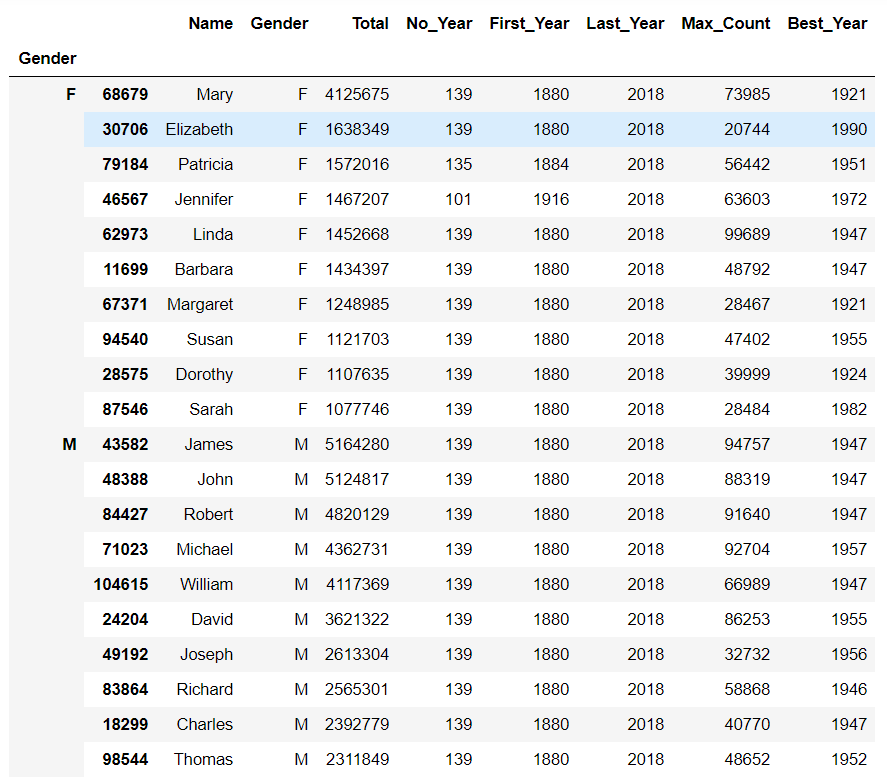

## General Trends over time (1880 - 2018)

11. __Count__ the total number of __registered Babies per Year__ and visualize. __Create__ the following Plot:

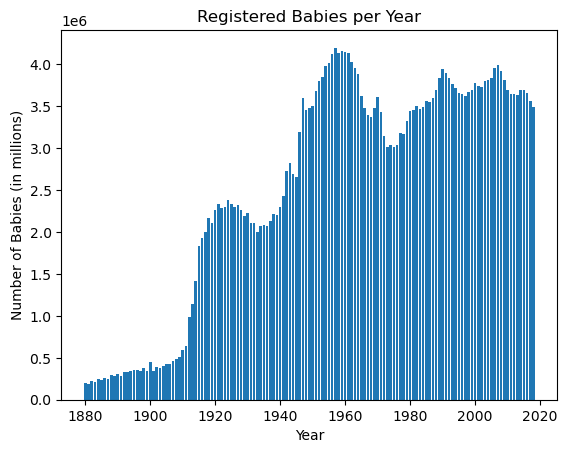

In [48]:
from matplotlib import pyplot as plt
plt.bar(df.groupby('Year').sum(numeric_only=True).index,df.groupby('Year').sum(numeric_only=True).Count)
plt.xlabel('Year')
plt.ylabel('Number of Babies (in millions)')
plt.title('Registered Babies per Year')
plt.show()

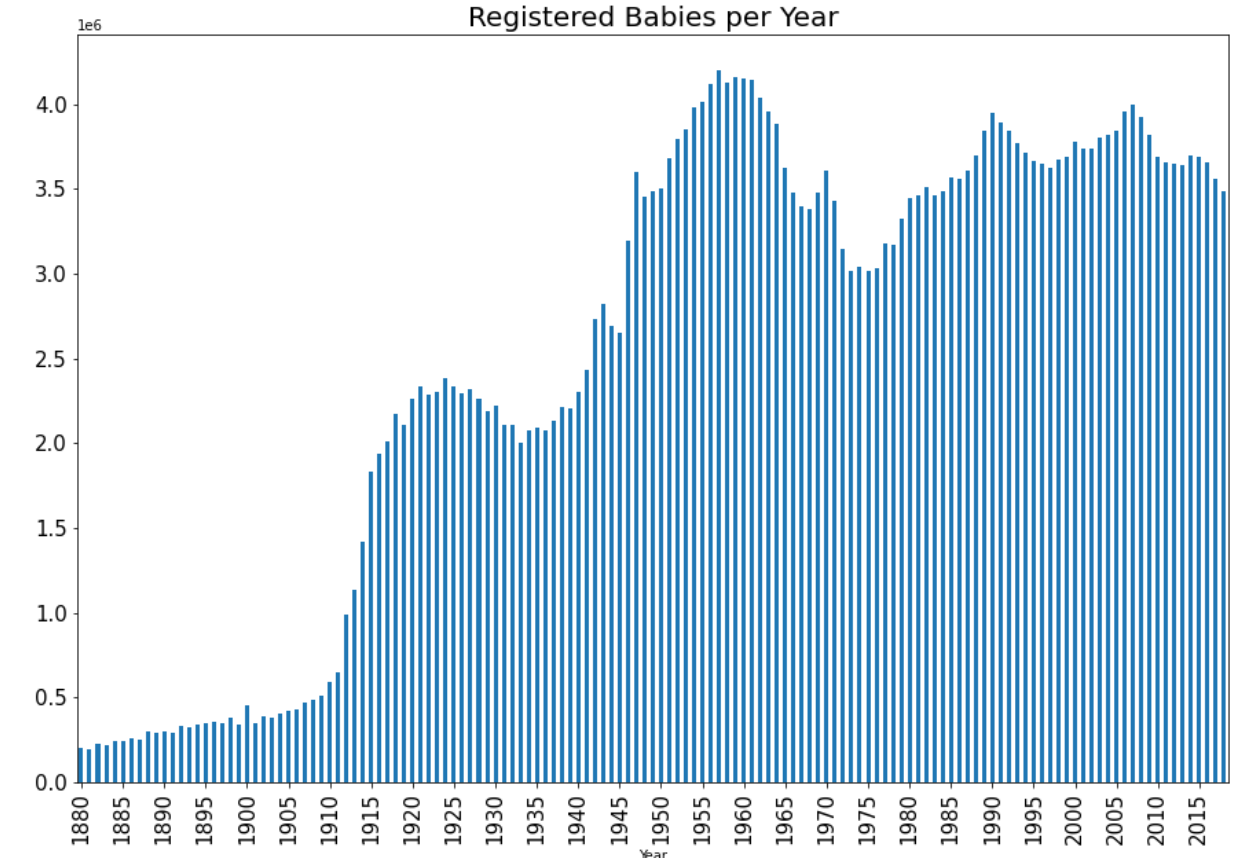

12. __Count__ the total number of __Unique Names per Year__ and visualize. __Create__ the following Plot:

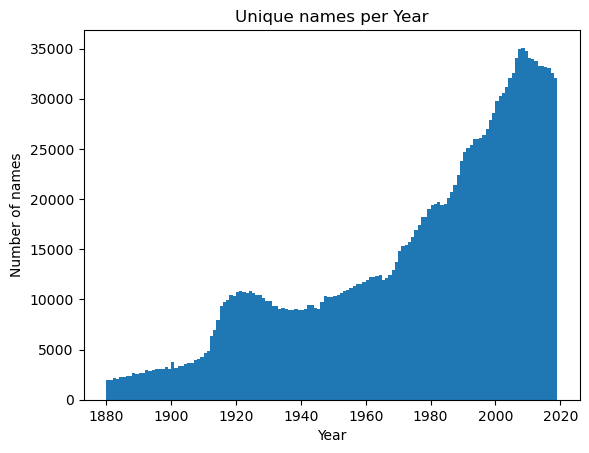

In [49]:
from matplotlib import pyplot as plt
plt.hist(df.Year, bins=range(1880,2020))
plt.xlabel('Year')
plt.ylabel('Number of names')
plt.title('Unique names per Year')
plt.show()

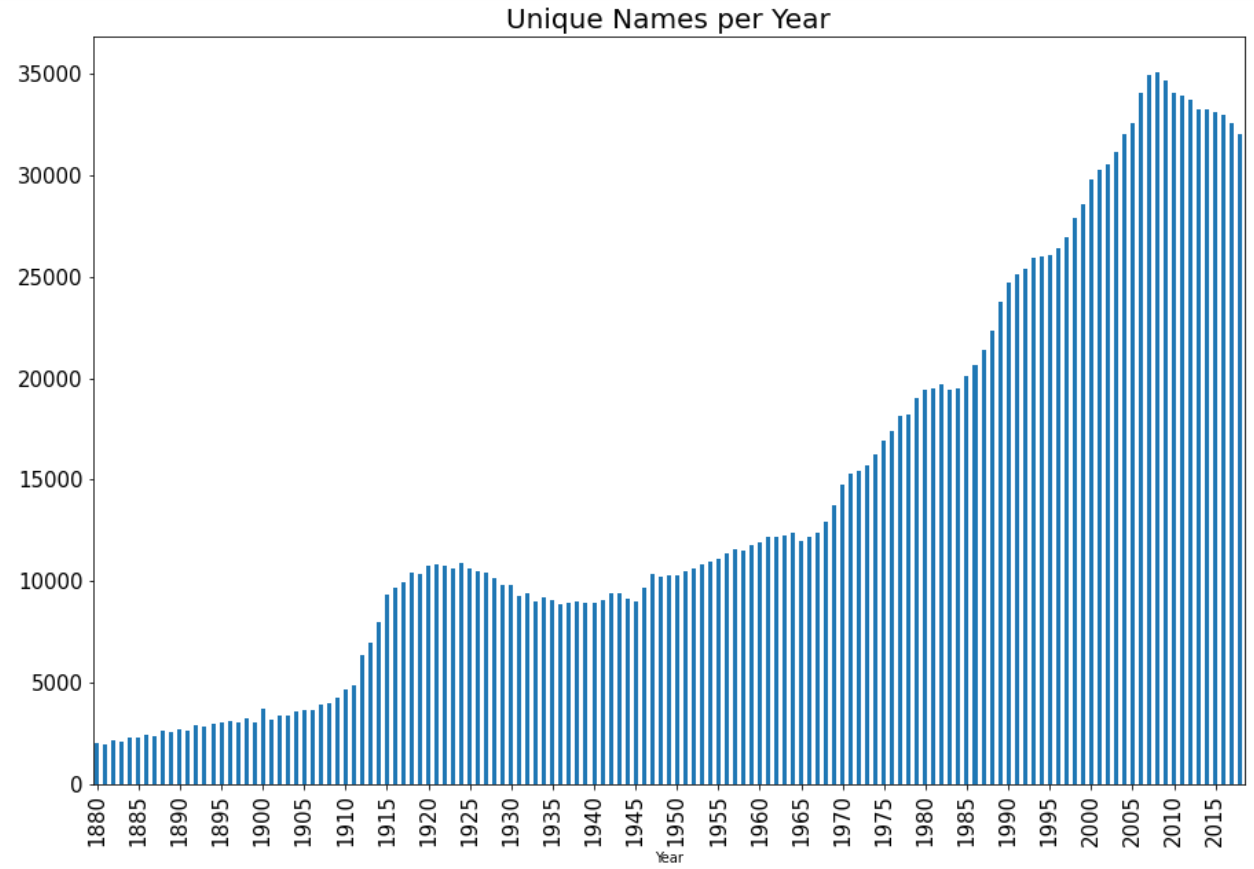

## Creating the Features "Popularity" and "Rank"

13. __Add__ the column __"Popularity"__ to df: <br> 

- Popularity in __babies per million__ (example: assume 2,000,000 registered Girl Names in 1950, thereof 100,000 Maries -> Popularity Score in 1950 for (Mary, F) is 100,000 / 2,000,000 * 1,000,000 = 50,000 per million.)  

In [54]:
total_year_gender=df.groupby(['Year','Gender']).Count.sum().rename('Total_year_gender')

In [55]:
df_pop=df.join(total_year_gender,on=['Year','Gender'],how='left')
df_pop

,Year,Name,Gender,Count,Total_year_gender
0,1880,Mary,F,7065,90994
1,1880,Anna,F,2604,90994
2,1880,Emma,F,2003,90994
3,1880,Elizabeth,F,1939,90994
4,1880,Minnie,F,1746,90994
...,...,...,...,...,...
1957041,2018,Zylas,M,5,1800392
1957042,2018,Zyran,M,5,1800392
1957043,2018,Zyrie,M,5,1800392
1957044,2018,Zyron,M,5,1800392


In [56]:
df_pop['Popularity']=df_pop.Count.div(df_pop.Total_year_gender).mul(1000000)

14. __Add__ the column __"Rank"__ to df: <br> 

- Rank (example: assume Mary is the most popular Girl Name in 1950 -> Rank 1 for (Mary, F) in 1950.

In [303]:
rank=df_pop.groupby(['Year','Gender']).Popularity.rank(ascending=False)
df_rank=df_pop.copy()
df_rank['Rank']=rank
df_rank.drop(columns='Total_year_gender', inplace=True)
df_rank

,Year,Name,Gender,Count,Popularity,Rank
0,1880,Mary,F,7065,77642.481922,1.0
1,1880,Anna,F,2604,28617.271468,2.0
2,1880,Emma,F,2003,22012.440381,3.0
3,1880,Elizabeth,F,1939,21309.097303,4.0
4,1880,Minnie,F,1746,19188.078335,5.0
...,...,...,...,...,...,...
1957041,2018,Zylas,M,5,2.777173,13042.0
1957042,2018,Zyran,M,5,2.777173,13042.0
1957043,2018,Zyrie,M,5,2.777173,13042.0
1957044,2018,Zyron,M,5,2.777173,13042.0


After adding "Popularity" and "Rank", df should look as follows:

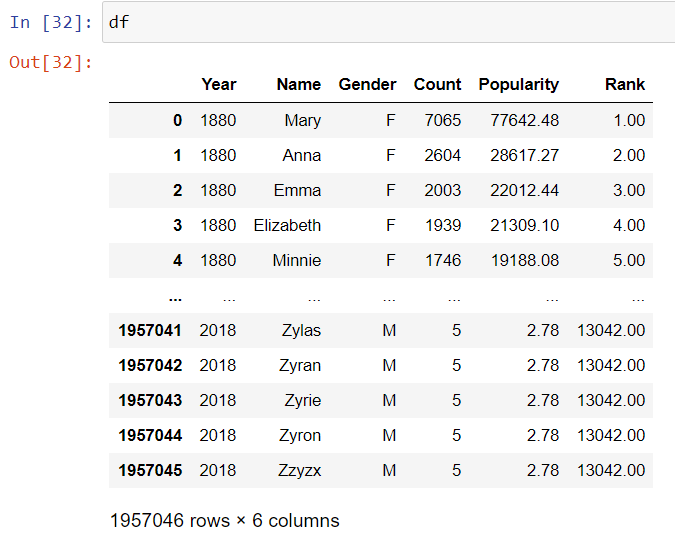

## Visualizing Name Trends over Time

15. __Visualize__ Popularity and Rank over time (see example below).

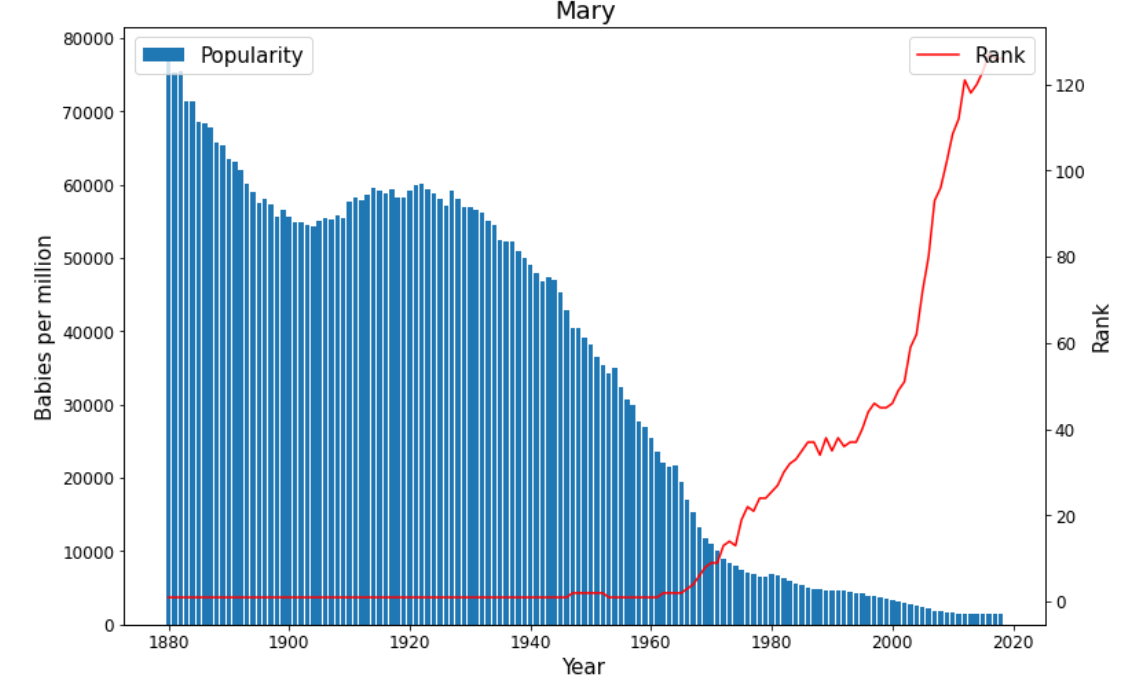

16. __Create__ this plot for all __Evergreen Names__ (see Questions 5. and 6.) (a reusable user-defined function might help)

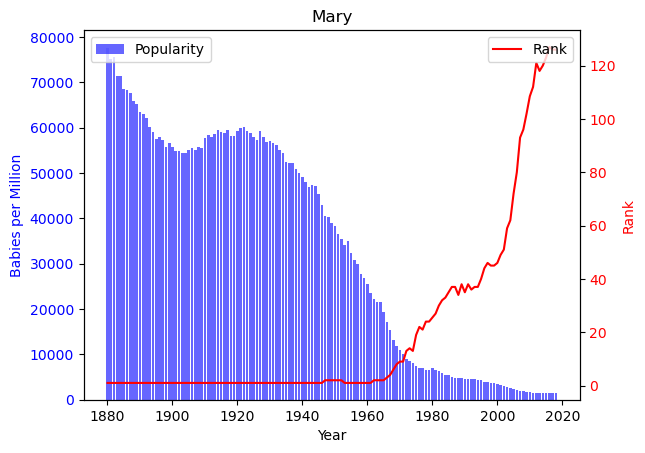

In [224]:
def plot_pop_rank(name,gender,crit='Popularity'):
    name_df=df_rank[(df_rank.Name==name)&(df_rank.Gender==gender)]
    fig, ax1 = plt.subplots()

    # Plot the bar graph for Popularity on the primary y-axis
    ax1.bar(name_df['Year'], name_df[crit], color='b', alpha=0.6, label=crit)
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Babies per Million', color='b')
    ax1.tick_params(axis='y', labelcolor='b')

    # Create a secondary y-axis for Rank
    ax2 = ax1.twinx()
    ax2.plot(name_df['Year'], name_df['Rank'], c='r', label='Rank')
    ax2.set_ylabel('Rank', color='r')
    ax2.tick_params(axis='y', labelcolor='r')

    # Add legends for both y-axes
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

    plt.title(name)
    plt.show()
plot_pop_rank('Mary','F')

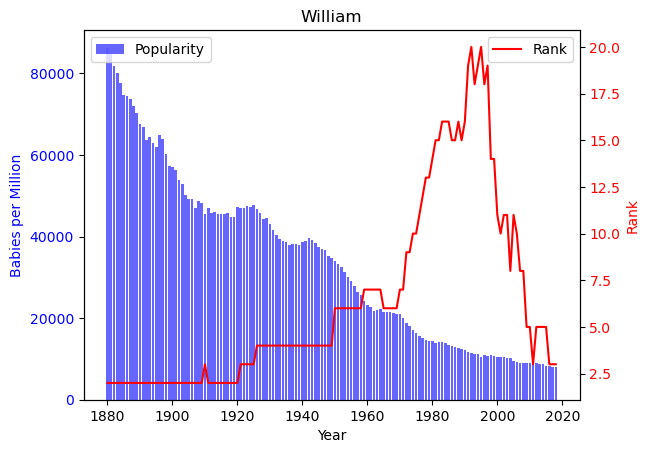

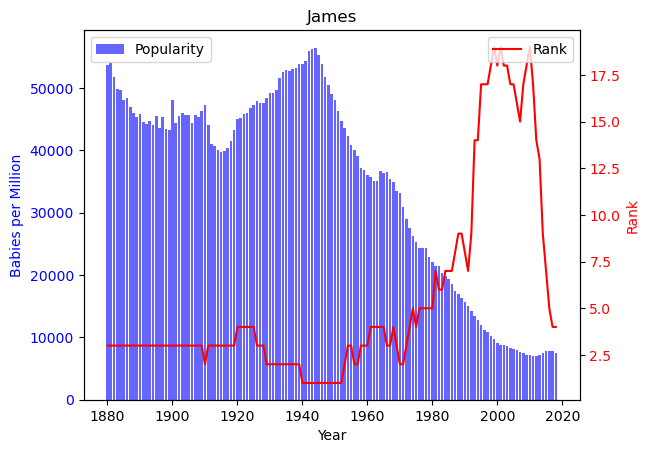

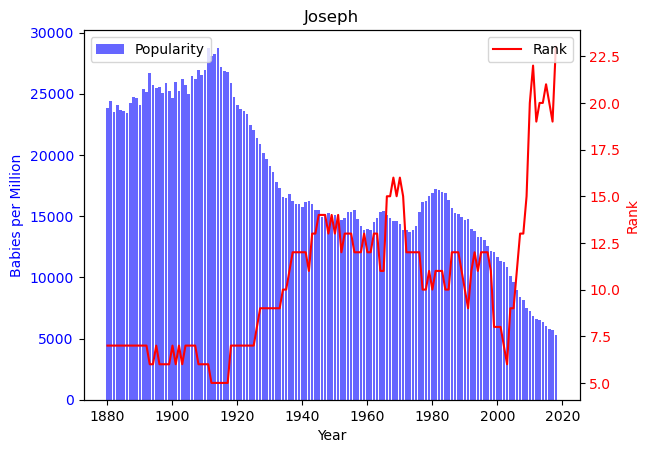

In [225]:
for i in evergreen_boy.head(3).index:
    plot_pop_rank(i,'M')

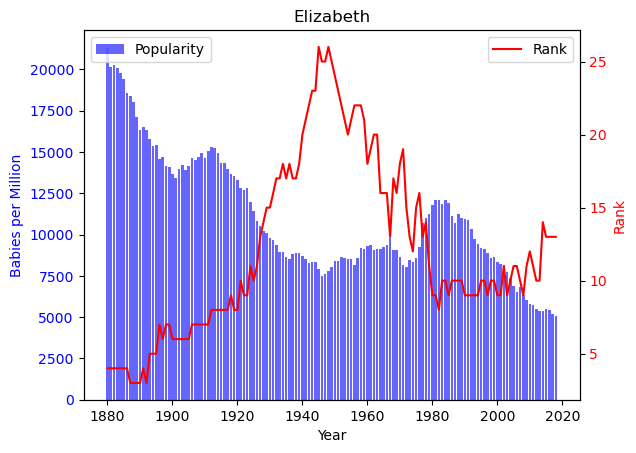

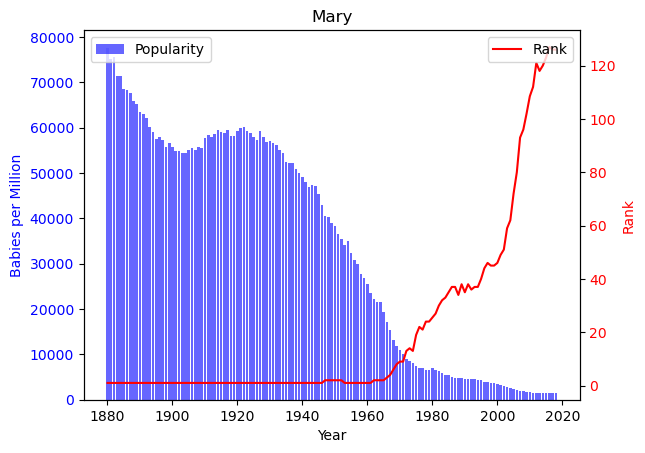

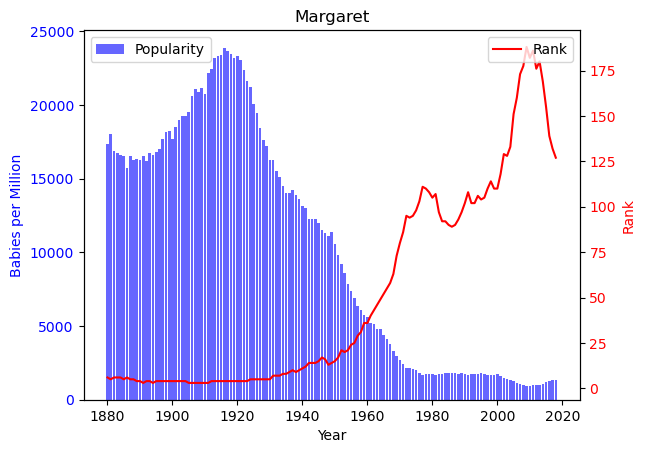

In [226]:
for i in evergreen_girl.head(3).index:
    plot_pop_rank(i,'F')

# Why does a Name´s Popularity suddenly change? (Part 1)

17. __Add__ the additional columns __"Pop_lag1"__ (Popularity one year ago) and __"Pop_diff"__ (change in popularity from previous year to this year) to df.  

In [227]:
df_rank['Pop_lag1']=df_rank.groupby(['Name','Gender']).Popularity.shift()
df_rank['Pop_lag1'].fillna(0,inplace=True)
df_rank

,Year,Name,Gender,Count,Popularity,Rank,Pop_lag1
0,1880,Mary,F,7065,77642.481922,1.0,0.000000
1,1880,Anna,F,2604,28617.271468,2.0,0.000000
2,1880,Emma,F,2003,22012.440381,3.0,0.000000
3,1880,Elizabeth,F,1939,21309.097303,4.0,0.000000
4,1880,Minnie,F,1746,19188.078335,5.0,0.000000
...,...,...,...,...,...,...,...
1957041,2018,Zylas,M,5,2.777173,13042.0,3.798491
1957042,2018,Zyran,M,5,2.777173,13042.0,3.138835
1957043,2018,Zyrie,M,5,2.777173,13042.0,2.713208
1957044,2018,Zyron,M,5,2.777173,13042.0,8.139624


In [228]:
df_rank['Pop_diff']=df_rank.Popularity-df_rank.Pop_lag1
df_rank

,Year,Name,Gender,Count,Popularity,Rank,Pop_lag1,Pop_diff
0,1880,Mary,F,7065,77642.481922,1.0,0.000000,77642.481922
1,1880,Anna,F,2604,28617.271468,2.0,0.000000,28617.271468
2,1880,Emma,F,2003,22012.440381,3.0,0.000000,22012.440381
3,1880,Elizabeth,F,1939,21309.097303,4.0,0.000000,21309.097303
4,1880,Minnie,F,1746,19188.078335,5.0,0.000000,19188.078335
...,...,...,...,...,...,...,...,...
1957041,2018,Zylas,M,5,2.777173,13042.0,3.798491,-1.021318
1957042,2018,Zyran,M,5,2.777173,13042.0,3.138835,-0.361662
1957043,2018,Zyrie,M,5,2.777173,13042.0,2.713208,0.063965
1957044,2018,Zyron,M,5,2.777173,13042.0,8.139624,-5.362451


18. __Create__ df2 starting with the __year 1900__ (from 1900 till today).

In [229]:
df2=df_rank[df_rank.Year>=1900]
df2

,Year,Name,Gender,Count,Popularity,Rank,Pop_lag1,Pop_diff
52265,1900,Mary,F,16706,55724.187620,1.0,56526.608961,-802.421342
52266,1900,Helen,F,6343,21157.579437,2.0,21663.097634,-505.518197
52267,1900,Anna,F,6114,20393.731779,3.0,21950.622900,-1556.891120
52268,1900,Margaret,F,5304,17691.912554,4.0,18234.251555,-542.339000
52269,1900,Ruth,F,4765,15894.035317,5.0,16788.042382,-894.007065
...,...,...,...,...,...,...,...,...
1957041,2018,Zylas,M,5,2.777173,13042.0,3.798491,-1.021318
1957042,2018,Zyran,M,5,2.777173,13042.0,3.138835,-0.361662
1957043,2018,Zyrie,M,5,2.777173,13042.0,2.713208,0.063965
1957044,2018,Zyron,M,5,2.777173,13042.0,8.139624,-5.362451


19. __Filter__ df2 and find the __20 largest values__ in "Pop_diff" (get complete rows).

In [230]:
biggest_pop_change=df2.nlargest(20,'Pop_diff')
biggest_pop_change=biggest_pop_change[~biggest_pop_change.duplicated(subset='Name')]
biggest_10_pop_change=biggest_pop_change.head(10)
biggest_10_pop_change

,Year,Name,Gender,Count,Popularity,Rank,Pop_lag1,Pop_diff
431066,1947,Linda,F,99689,56236.224976,1.0,33546.795584,22689.429392
321479,1935,Shirley,F,42358,40398.317993,2.0,21874.356531,18523.961462
922468,1983,Ashley,F,33293,19930.187772,4.0,8774.639361,11155.548411
711426,1971,Jennifer,F,56783,34133.547814,1.0,26403.416193,7730.131621
645417,1966,Michelle,F,27151,16047.477506,4.0,9186.178467,6861.299039
751941,1973,Jason,M,46683,29939.989187,3.0,23080.621302,6859.367885
844807,1979,Amanda,F,31928,19889.848316,3.0,13393.836368,6496.011948
472253,1951,Deborah,F,42052,23351.039669,4.0,16965.497515,6385.542154
838069,1978,Nicholas,M,16353,9955.734029,25.0,3699.334898,6256.399131
472267,1951,Debra,F,17066,9476.572886,18.0,3607.568890,5869.003996


20. __Create__ the popularity/rank plot (see 15. and 16.) for the Names filtered in 19.

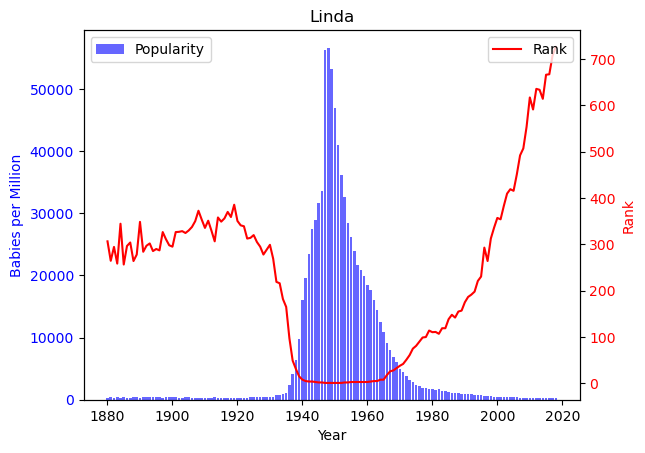

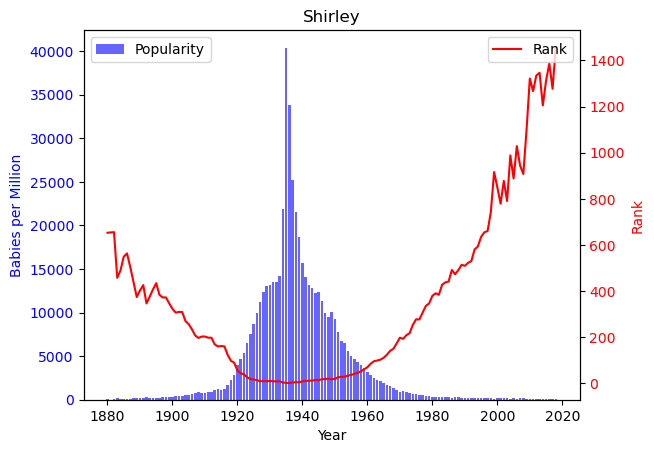

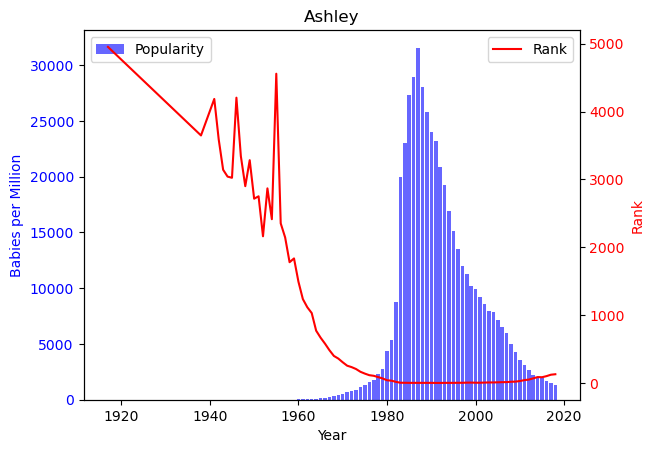

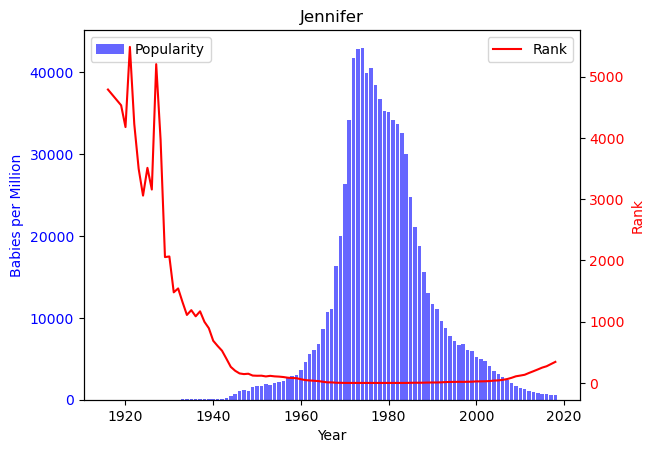

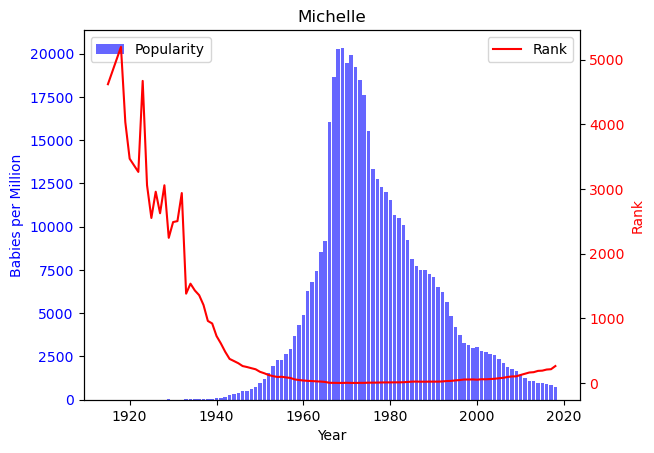

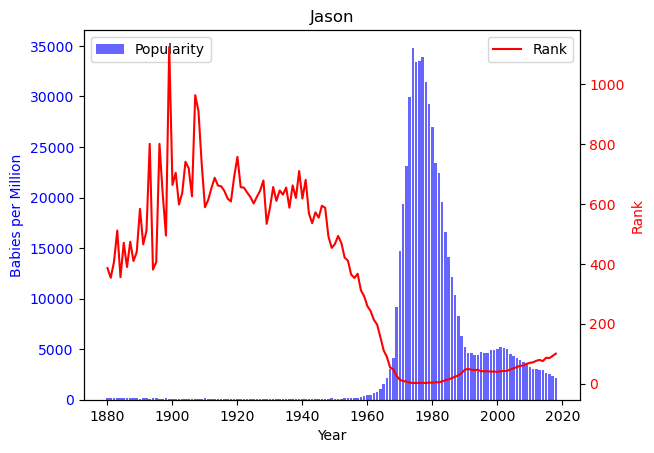

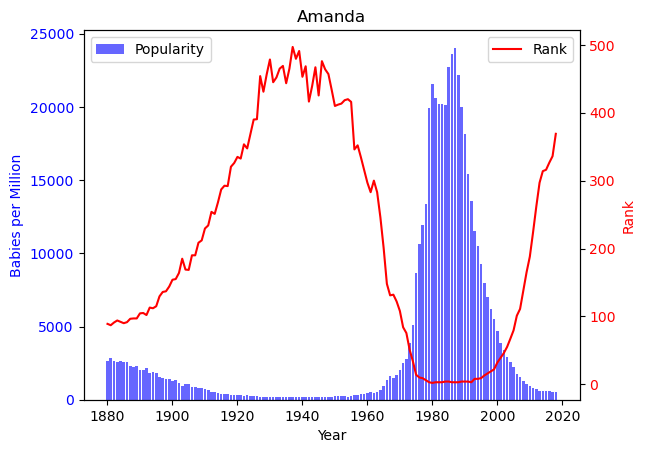

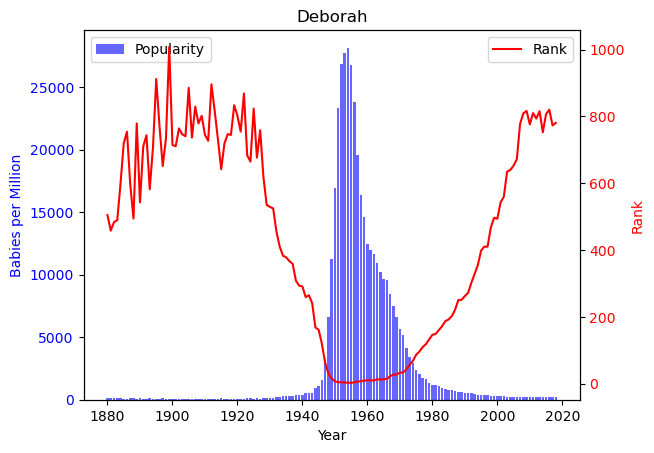

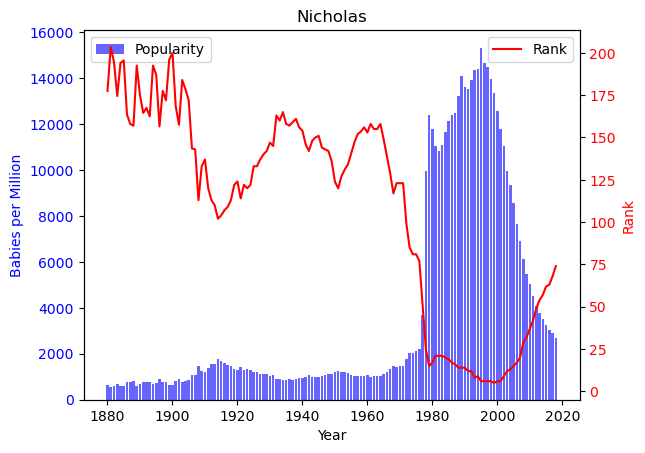

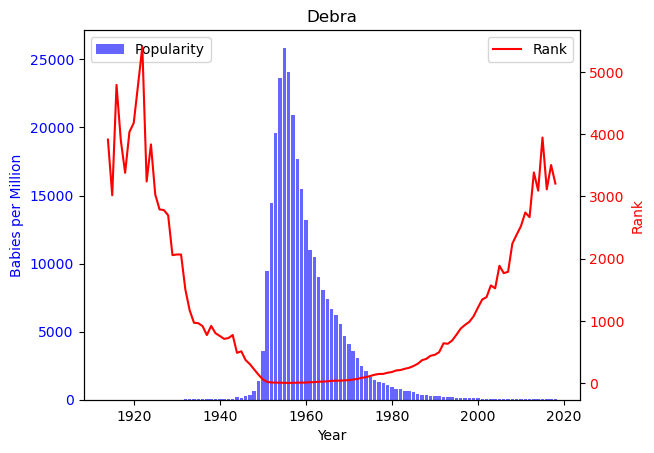

In [231]:
for idx,i in biggest_10_pop_change.iterrows():
    plot_pop_rank(i.Name,i.Gender)

## Why does a Name´s Popularity suddenly change? (Part 2)

In [232]:
df2=df2.fillna(0)
new_names=df2[df2.Pop_lag1<5].nlargest(20,'Pop_diff')
new_names

,Year,Name,Gender,Count,Popularity,Rank,Pop_lag1,Pop_diff
758040,1974,Nakia,F,1134,772.792261,226.0,4.800564,767.991697
808621,1977,Kizzy,F,1116,727.930213,223.0,0.000000,727.930213
1060680,1989,Christop,M,1082,540.882628,241.5,0.000000,540.882628
768358,1974,Nakia,M,612,389.073890,302.0,0.000000,389.073890
820064,1977,Levar,M,523,318.163485,342.5,0.000000,318.163485
645832,1966,Tabatha,F,500,295.522771,419.0,2.832792,292.689979
1553888,2007,Jaslene,F,501,260.794471,599.5,2.631823,258.162648
1223510,1996,Moesha,F,426,243.061479,547.5,0.000000,243.061479
1070200,1990,Isamar,F,446,234.967481,533.5,0.000000,234.967481
961890,1985,Sade,F,393,228.417987,512.5,0.000000,228.417987


In [257]:
df2['%change']=((df2.Popularity/df2.Pop_lag1)-1)*100
df2

,Year,Name,Gender,Count,Popularity,Rank,Pop_lag1,Pop_diff,%change
52265,1900,Mary,F,16706,55724.187620,1.0,56526.608961,-802.421342,-1.419546
52266,1900,Helen,F,6343,21157.579437,2.0,21663.097634,-505.518197,-2.333545
52267,1900,Anna,F,6114,20393.731779,3.0,21950.622900,-1556.891120,-7.092697
52268,1900,Margaret,F,5304,17691.912554,4.0,18234.251555,-542.339000,-2.974287
52269,1900,Ruth,F,4765,15894.035317,5.0,16788.042382,-894.007065,-5.325261
...,...,...,...,...,...,...,...,...,...
1957041,2018,Zylas,M,5,2.777173,13042.0,3.798491,-1.021318,-26.887470
1957042,2018,Zyran,M,5,2.777173,13042.0,3.138835,-0.361662,-11.522185
1957043,2018,Zyrie,M,5,2.777173,13042.0,2.713208,0.063965,2.357542
1957044,2018,Zyron,M,5,2.777173,13042.0,8.139624,-5.362451,-65.880819


## Most Popular Unisex Names

22. __Find__ the most popular __Unisex Names__ of all times. (Unisex names are names given to Boys and Girls).  

In [304]:
names_both_genders_mask=df_rank.groupby(['Name','Gender']).Popularity.sum().index.get_level_values(0).duplicated(keep=False)

In [363]:
unisex=df_rank.groupby(['Name','Gender']).Count.sum()[names_both_genders_mask].unstack()
unisex['Total']=unisex.M+unisex.F
popular_unisex=unisex[((unisex.M/unisex.F)<3) & ((unisex.M/unisex.F)>0.33)&(unisex.M>1000)&(unisex.F>1000)].copy()
popular_unisex['Ratio_of_females']=popular_unisex.F/popular_unisex.M
popular_unisex.sort_values('Total', ascending=False).head(20)

Gender,F,M,Total,Ratio_of_females
Name,,,,
Jordan,131004,374513,505517,0.349798
Taylor,320446,110390,430836,2.902854
Leslie,267081,112726,379807,2.369294
Angel,95710,231800,327510,0.412899
Jessie,167462,110212,277674,1.519453
Marion,188391,72075,260466,2.613819
Riley,106901,94278,201179,1.133891
Casey,76312,110635,186947,0.689764
Avery,125883,55646,181529,2.262211


In [374]:
#Look for more equally spread names
popular_unisex=unisex[unisex.Total>500].copy()
popular_unisex['spread']=abs((popular_unisex.M/popular_unisex.F)-1)
popular_unisex.sort_values('spread').head(50)


Gender,F,M,Total,spread
Name,,,,
Daine,298,298,596,0.000000
Joell,1029,1035,2064,0.005831
Mackinley,310,308,618,0.006452
Rossi,278,280,558,0.007194
Arleigh,499,503,1002,0.008016
Amory,475,479,954,0.008421
Kayde,322,325,647,0.009317
Unknown,9481,9390,18871,0.009598
Kendel,795,786,1581,0.011321


# Choosing my own baby names

In [449]:
unique_names=df.groupby(['Name','Gender']).Count.sum().to_frame()
unique_names.reset_index(inplace=True)
posibles_F=unique_names[(unique_names.Count>300)&(unique_names.Name.str.len()<6)&(unique_names.Gender=='F')]
posibles_M=unique_names[(unique_names.Count>300)&(unique_names.Name.str.len()<6)&(unique_names.Gender=='M')]

In [450]:
list(posibles_F.Name)

['Aadya',
 'Aalia',
 'Aanya',
 'Aaria',
 'Aarin',
 'Aarna',
 'Aaron',
 'Aarti',
 'Aarya',
 'Aaryn',
 'Aasha',
 'Aashi',
 'Aayla',
 'Abbe',
 'Abbey',
 'Abbi',
 'Abbie',
 'Abby',
 'Abcde',
 'Abeer',
 'Abena',
 'Abeni',
 'Abi',
 'Abra',
 'Abrar',
 'Abree',
 'Abria',
 'Abril',
 'Ada',
 'Adah',
 'Adair',
 'Adali',
 'Adaly',
 'Adam',
 'Adama',
 'Adara',
 'Adaya',
 'Adda',
 'Addi',
 'Addie',
 'Addy',
 'Adel',
 'Adela',
 'Adele',
 'Adell',
 'Aden',
 'Adena',
 'Adhya',
 'Adi',
 'Adia',
 'Adina',
 'Adira',
 'Aditi',
 'Adlee',
 'Adley',
 'Adna',
 'Adora',
 'Adore',
 'Adra',
 'Adrea',
 'Adria',
 'Aela',
 'Aerin',
 'Aeris',
 'Aeryn',
 'Aesha',
 'Aeva',
 'Afia',
 'Afnan',
 'Afton',
 'Agata',
 'Aggie',
 'Agnes',
 'Ahana',
 'Ahlam',
 'Ahmya',
 'Ahna',
 'Ahuva',
 'Ai',
 'Aicha',
 'Aida',
 'Aidan',
 'Aide',
 'Aidee',
 'Aiden',
 'Aidyn',
 'Aija',
 'Aijah',
 'Aiko',
 'Aila',
 'Ailee',
 'Ailen',
 'Ailey',
 'Aili',
 'Ailie',
 'Ailin',
 'Ailsa',
 'Ailyn',
 'Aime',
 'Aimee',
 'Aimie',
 'Aina',
 'Aine',
 'Aira